In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




In [3]:
red_wine = pd.read_csv('winequality-red.csv', sep = ";")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_wine = pd.read_csv('winequality-white.csv', sep = ";")
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Creating a new variable for categorizing the wine-quality

In [52]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
red_wine.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,low
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,low
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,low
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,medium
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,low
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5,low
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5,low
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7,medium
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7,medium
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,low


In [8]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine.tail(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,low
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,medium
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,medium
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,medium
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,low
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


In [40]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


ANOVA calculation

In [41]:
F,p =stats.f_oneway(white_wine[white_wine['quality_label']=='low']['alcohol'], 
                    white_wine[white_wine['quality_label']=='medium']['alcohol'],
                    white_wine[white_wine['quality_label']=='high']['alcohol'])
print('F Statistic:', F, '\np_value:', p)

F Statistic: 478.1628922043277 
p_value: 2.0647901873531918e-190


In [42]:
F,p =stats.f_oneway(red_wine[red_wine['quality_label']=='low']['alcohol'], 
                    red_wine[red_wine['quality_label']=='medium']['alcohol'],
                    red_wine[red_wine['quality_label']=='high']['alcohol'])
print('F Statistic:', F, '\np_value:', p)

F Statistic: 205.23448800361507 
p_value: 4.776936653588672e-80


Visualizing both datasets

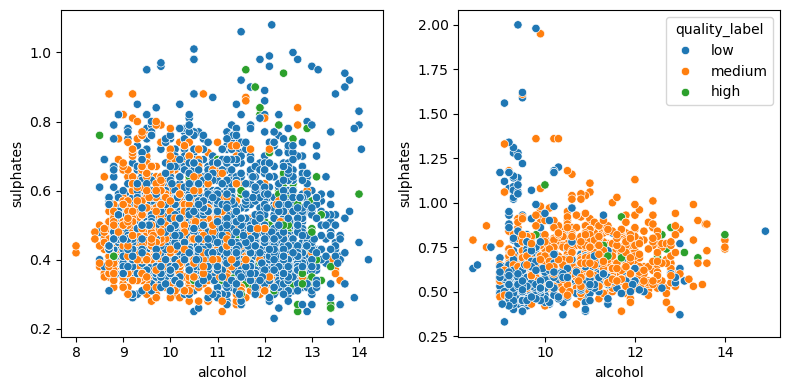

In [43]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (8,4))
                       
sns.scatterplot(data=red_wine, ax=axes[1], x="alcohol", y="sulphates", hue="quality_label")
sns.scatterplot(data=white_wine, ax=axes[0], x="alcohol", y="sulphates", hue="quality_label", legend=False)
plt.tight_layout()


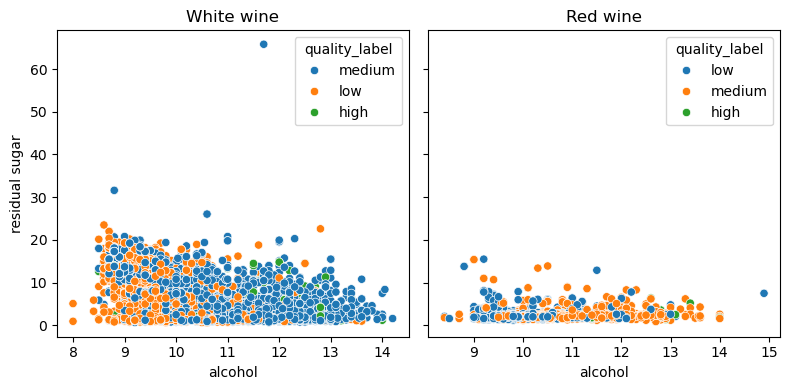

In [44]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (8,4), sharey=True)
                       
sns.scatterplot(data=red_wine, ax=axes[1], x="alcohol", y="residual sugar", hue="quality_label").set_title('Red wine')
sns.scatterplot(data=white_wine, ax=axes[0], x="alcohol", y="residual sugar", hue="quality_label").set_title('White wine')
plt.tight_layout()


<Axes: xlabel='alcohol', ylabel='sulphates'>

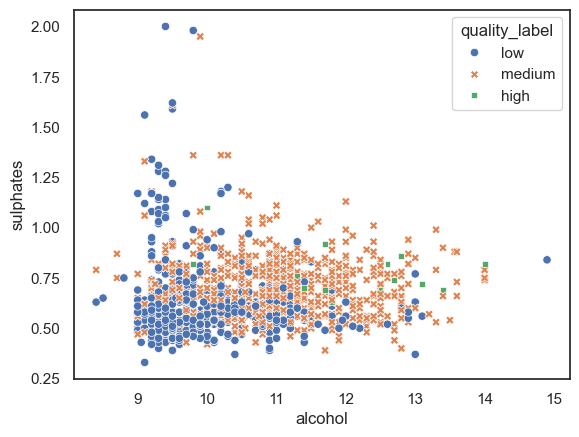

In [53]:
                       
sns.scatterplot(data=red_wine, x="alcohol", y="sulphates", hue="quality_label", style='quality_label')


<Axes: xlabel='quality', ylabel='alcohol'>

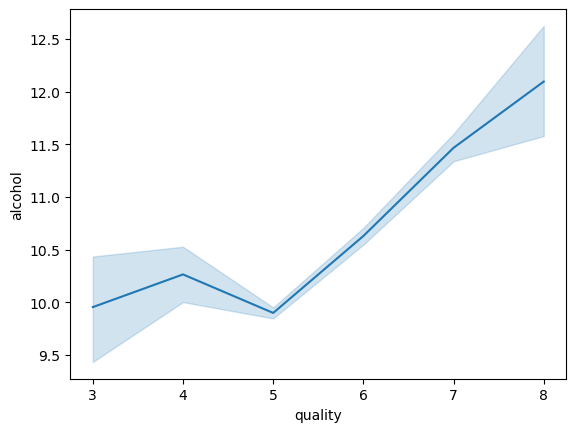

In [5]:
sns.lineplot(data=red_wine, y="alcohol", x="quality")

<Axes: >

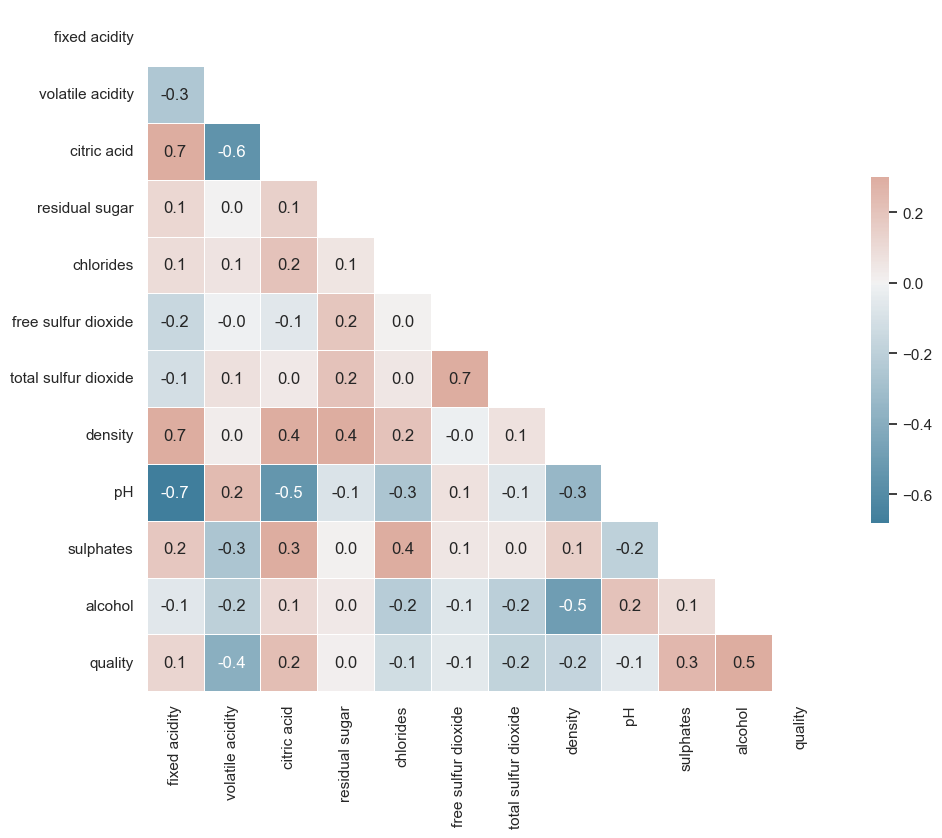

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme(style="white")

red_wine = red_wine.drop(axis=1, columns=['quality_label']) 


# Compute the correlation matrix
corr = red_wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True, fmt=".1f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Running ANOVA calc across the entire dataset of red wine

In [59]:
anova_results = []
variables = red_wine.columns.drop(['quality_label'])
for z in variables:
    F, p = stats.f_oneway(
        red_wine[red_wine['quality_label'] == 'low'][z],
        red_wine[red_wine['quality_label'] == 'medium'][z],
        red_wine[red_wine['quality_label'] == 'high'][z]
    )
    anova_results.append({'Variable': z, 'F_value': F, 'P_value': p})

anova_results_red = pd.DataFrame(anova_results)
anova_results_red

,Variable,F_value,P_value
0,fixed acidity,7.31,0.00
1,volatile acidity,92.87,0.00
2,citric acid,22.86,0.00
3,residual sugar,0.01,0.99
4,chlorides,10.54,0.00
5,free sulfur dioxide,3.39,0.03
6,total sulfur dioxide,45.71,0.00
7,density,25.02,0.00
8,pH,0.74,0.48
9,sulphates,41.84,0.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)


showing correlation via heatmap with identified significance (p-values)

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'chlorides'),
 Text(4.5, 0, 'free sulfur dioxide'),
 Text(5.5, 0, 'total sulfur dioxide'),
 Text(6.5, 0, 'density'),
 Text(7.5, 0, 'sulphates'),
 Text(8.5, 0, 'alcohol'),
 Text(9.5, 0, 'quality')]

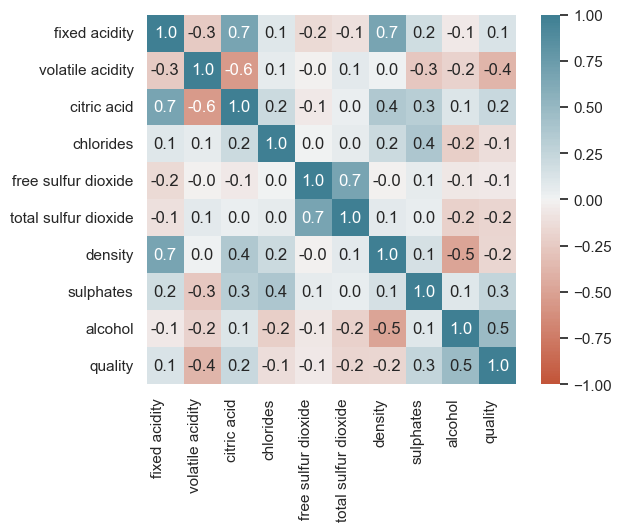

In [ ]:
red_wine = red_wine.drop(axis=1, columns=['pH', 'residual sugar'])
corr = red_wine.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True, fmt=".1f",
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

Running ANOVA calc across the entire dataset of white wine

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [14]:
anova_results = []
variables = white_wine.columns.drop(['quality_label'])
for z in variables:
    F, p = stats.f_oneway(
        white_wine[white_wine['quality_label'] == 'low'][z],
        white_wine[white_wine['quality_label'] == 'medium'][z],
        white_wine[white_wine['quality_label'] == 'high'][z]
    )
    anova_results.append({'Variable': z, 'F_value': F, 'P_value': p})

anova_results_white = pd.DataFrame(anova_results)
anova_results_white

,Variable,F_value,P_value
0,fixed acidity,21.92,0.00
1,volatile acidity,133.67,0.00
2,citric acid,0.23,0.79
3,residual sugar,21.93,0.00
4,chlorides,90.87,0.00
5,free sulfur dioxide,0.59,0.55
6,total sulfur dioxide,76.66,0.00
7,density,209.69,0.00
8,pH,19.69,0.00
9,sulphates,7.12,0.00


showing correlation via heatmap with identified significance (p-values) for white wine

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'residual sugar'),
 Text(3.5, 0, 'chlorides'),
 Text(4.5, 0, 'total sulfur dioxide'),
 Text(5.5, 0, 'density'),
 Text(6.5, 0, 'pH'),
 Text(7.5, 0, 'sulphates'),
 Text(8.5, 0, 'alcohol'),
 Text(9.5, 0, 'quality')]

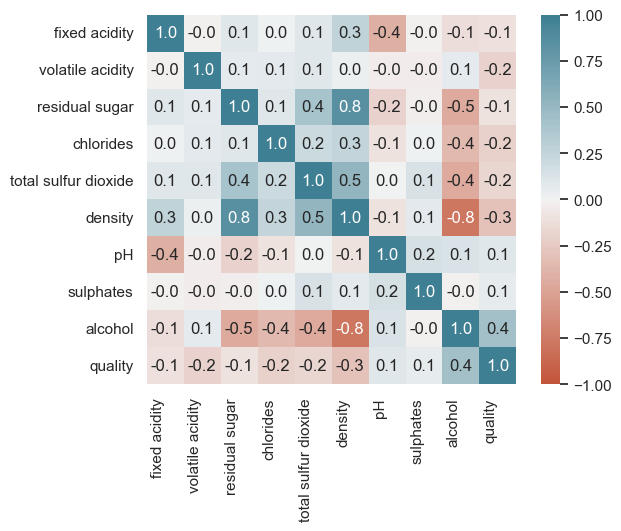

In [67]:
white_wine = white_wine.drop(axis=1, columns=['quality_label'])
corr = white_wine.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True, fmt=".1f",
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

cleaning of red + white wine data for proper EDA

In [6]:
red_wine.drop_duplicates(ignore_index=True,inplace=True)
red_wine.to_csv("cleaned_red_wine.csv")
red_wine['wine_type']=0

In [7]:
white_wine.drop_duplicates(ignore_index=True,inplace=True)
white_wine.to_csv("cleaned_white_wine.csv")
white_wine['wine_type']=1

Concatenate both wine datasets

In [8]:
both_wines = pd.concat([red_wine, white_wine], axis=0)
both_wines.tail(20)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
3941,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.800000,5,1
3942,6.2,0.530,0.02,0.90,0.035,6.0,81.0,0.99234,3.24,0.35,9.500000,4,1
3943,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,1
3944,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.400000,6,1
3945,5.5,0.320,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.700000,5,1
3946,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.500000,6,1
3947,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.600000,5,1
3948,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.550000,6,1
3949,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,7,1
3950,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.000000,7,1


Create a correlation map as heatmap

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality'),
 Text(12.5, 0, 'wine_type')]

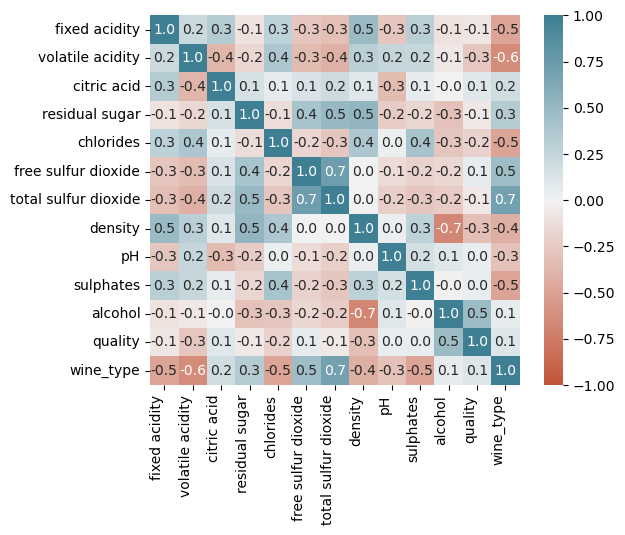

In [10]:
both_wines
corr = both_wines.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True, fmt=".1f",
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality'),
 Text(12.5, 0, 'wine_type')]

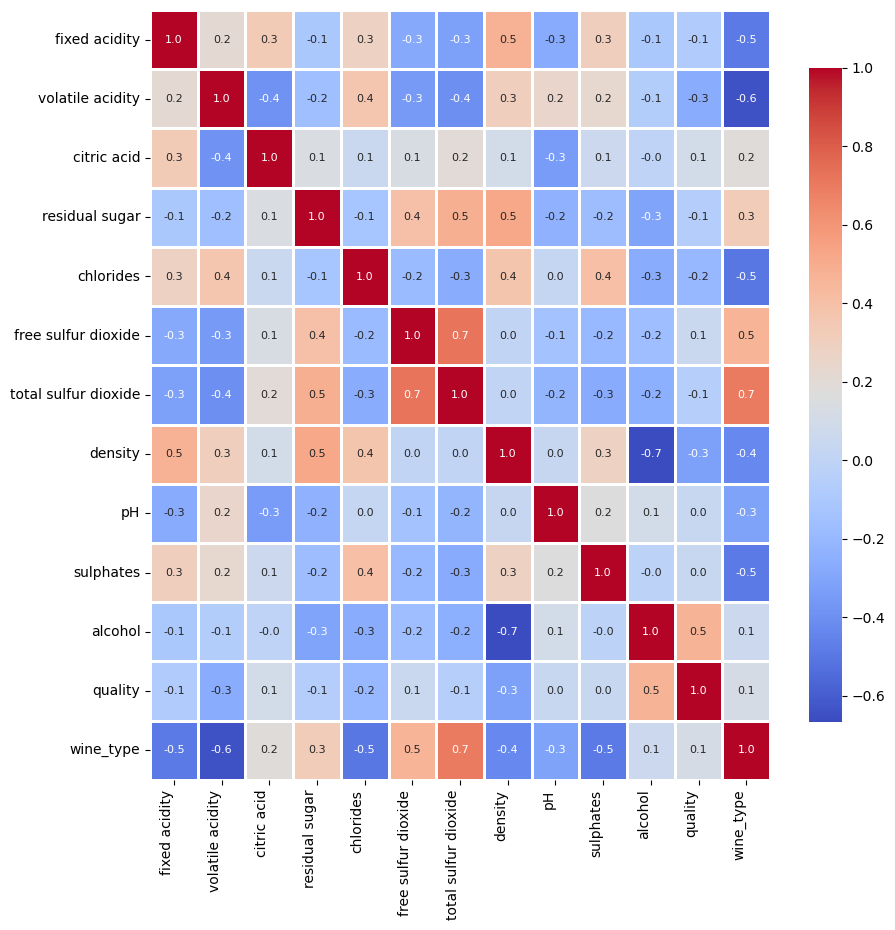

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
corr = both_wines.corr()
ax = sns.heatmap(
corr, annot=True, cmap='coolwarm', ax=ax,annot_kws={'size': 8}, fmt=".1f",linewidths=2,cbar_kws={'shrink': 0.85} )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')